Step 1: Visualize the dataset and get an intuitive understanding of relationship between the predictor variables and the target variables before building the model.

In [1]:
import numpy as np
import pandas as pd

In [2]:
#read the csv
advertise=pd.read_csv("advertising.csv")

In [3]:
advertise.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
advertise.shape

(200, 4)

In [5]:
advertise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
advertise.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


C:\Users\gangu\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


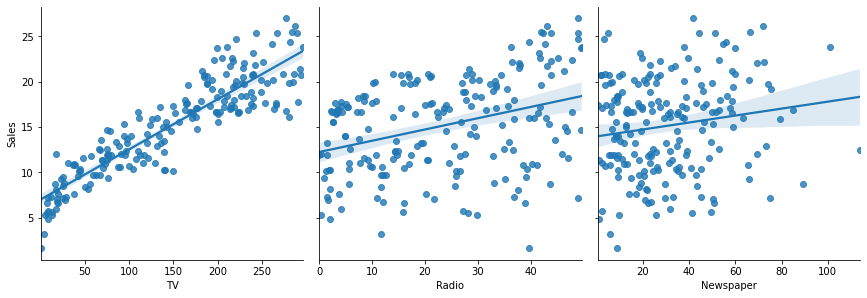

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(advertise, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='reg', size=4, aspect=1)
plt.show()

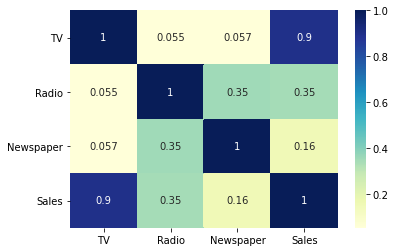

In [8]:
sns.heatmap(advertise.corr(),annot=True, cmap='YlGnBu')
plt.show()

As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. So let's go ahead and perform simple linear regression using TV as our feature variable.

---
## Step 3: Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

In [9]:
X=advertise.TV
y=advertise.Sales

In [10]:
#Split train and test data
import sklearn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.7, random_state=100)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140,)
(60,)
(140,)
(60,)


Statsmodel function doesn't have an intercept. So we need to dosomething for it.
By default, the statsmodels library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the add_constant attribute of statsmodels. And once you've added the constant to your X_train dataset, you can go ahead and fit a regression line using the OLS (Ordinary Least Squares) attribute of statsmodels as shown below

In [12]:
X_train_sm=sm.add_constant(X_train)
X_train_sm

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3
...,...,...
87,1.0,110.7
103,1.0,187.9
67,1.0,139.3
24,1.0,62.3


In [13]:
#create an onject
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

The equation formed is
sales = 6.948683 + (0.054546 . TV)
Coefficient of TV is positive which is true because sales increases as advertisement in TV increases.
If TV advertisements is 0, sales would be 6.948683
If we increase the amount on TV advertisement by 1 unit, sales would increase 0.054546 times.

In [14]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Fri, 15 Jan 2021   Prob (F-statistic):           1.52e-52
Time:                        22:05:29   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Advantage of using statsmodel is that we can have a detailed summary of the model unlike sklearn.
Statsmodel is mostly used by statisticians and sklearn is mostly used by programmers.


When we look at the summary we can infer the following points:

1. The coefficients derived by the model are 6.9487 and 0.0545 and the fact that the p-value of the coefficients is very low(0) means that the coefficients are significant/ the model believes that the relationship between sales and TV and the coefficients are not derived by-chance. There is indeed a real statitically significant relationship.

2. R squared value of 0.816 means that almost 81% of the variance in sales is explained by Variable TV. Even though corelation is not equal to causation but with good domain knowledge it can be inferred whether there is a significant causation to the corelation. In this case- Yes

3. Prob (F-statistic) viz is p-value of F-statistics which is a very small number meaning the model fit is statistically significant and that the explained R squared is not derived by chance

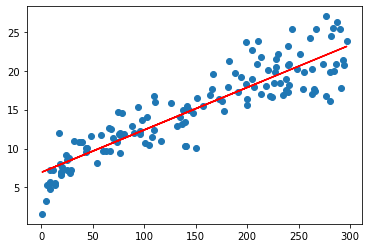

In [15]:
plt.scatter(X_train, y_train)
plt.plot(X_train,6.948683 + 0.054546 * X_train ,'r')
plt.show()

### Residual Analysis

In [16]:
y_train_pred = lr_model.predict(X_train_sm)

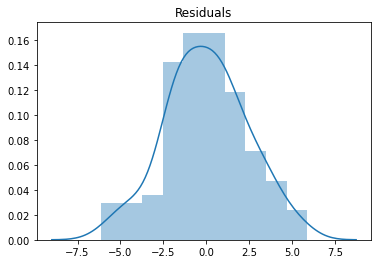

In [17]:
residual=y_train-y_train_pred
sns.distplot(residual)
plt.title('Residuals')
plt.show()

The residual plot looks like a normally distributed plot.

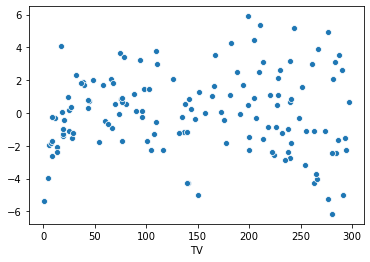

In [18]:
sns.scatterplot(X_train,residual)
plt.show()

We are confident that the model is good enough since the residuals are normally distributed and there is no easy identifiable patterns for residuals

In [19]:
X_test_sm=sm.add_constant(X_test)

y_test_pred=lr_model.predict(X_test_sm)

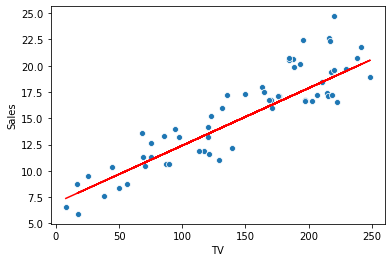

In [21]:
sns.scatterplot(X_test, y_test)
plt.plot(X_test, y_test_pred,'r')
plt.show()

In [22]:
from sklearn.metrics import r2_score
r2=r2_score(y_true=y_test,y_pred=y_test_pred)
r2

0.7921031601245658

In [23]:
r2=r2_score(y_true=y_train,y_pred=y_train_pred)
r2

0.8157933136480389

If the r2 for test data lies within 5% +- from the train data then the metric is pretty good. Hence the model is stable.


### Linear Regression using Sklearn

In [25]:
#train test split
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.7, random_state=100)

In [31]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [33]:
X_train_lr=X_train.values.reshape(-1,1)

In [34]:
lr.fit(X_train_lr, y_train)

LinearRegression()

In [35]:
print(lr.coef_, lr.intercept_)

[0.05454575] 6.948683200001357


In [37]:
y_train_pred=lr.predict(X_train_lr)

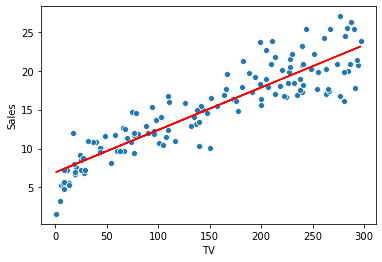

In [39]:
sns.scatterplot(X_train,y_train)
plt.plot(X_train, y_train_pred,'r')
plt.show()

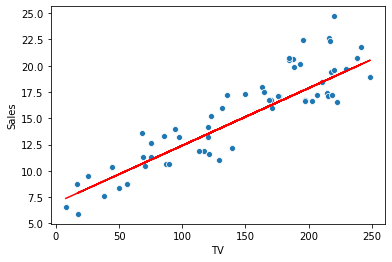

In [40]:
X_test_lr=X_test.values.reshape(-1,1)
y_test_pred=lr.predict(X_test_lr)
sns.scatterplot(X_test,y_test)
plt.plot(X_test, y_test_pred,'r')
plt.show()

In [41]:
from sklearn.metrics import r2_score
r2_train=r2_score(y_true=y_train, y_pred=y_train_pred)
r2_test=r2_score(y_true=y_test, y_pred=y_test_pred)
print(r2_train, r2_test)

0.8157933136480389 0.7921031601245662
